In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mode = 'Daily'#or Weekly
datatype = 'crimes'

In [3]:
data = pd.read_csv('cleared_data_workable.csv',index_col='DATE OCC',parse_dates=['DATE OCC'])#Enter name of the index col, that must be data column

,count
DATE OCC,
2010-01-01,64
2010-01-02,26
2010-01-03,34
2010-01-04,24
2010-01-05,31
...,...
2022-11-17,39
2022-11-18,28
2022-11-19,23


In [5]:
data = data.loc['2015-12-28':'2020-07-05']
data

,count
DATE OCC,
2015-12-28,41
2015-12-29,30
2015-12-30,43
2015-12-31,48
2016-01-01,73
...,...
2020-07-01,32
2020-07-02,37
2020-07-03,32


In [6]:
timed_data = data.resample('d' if mode == 'daily' else 'w').sum()

1652

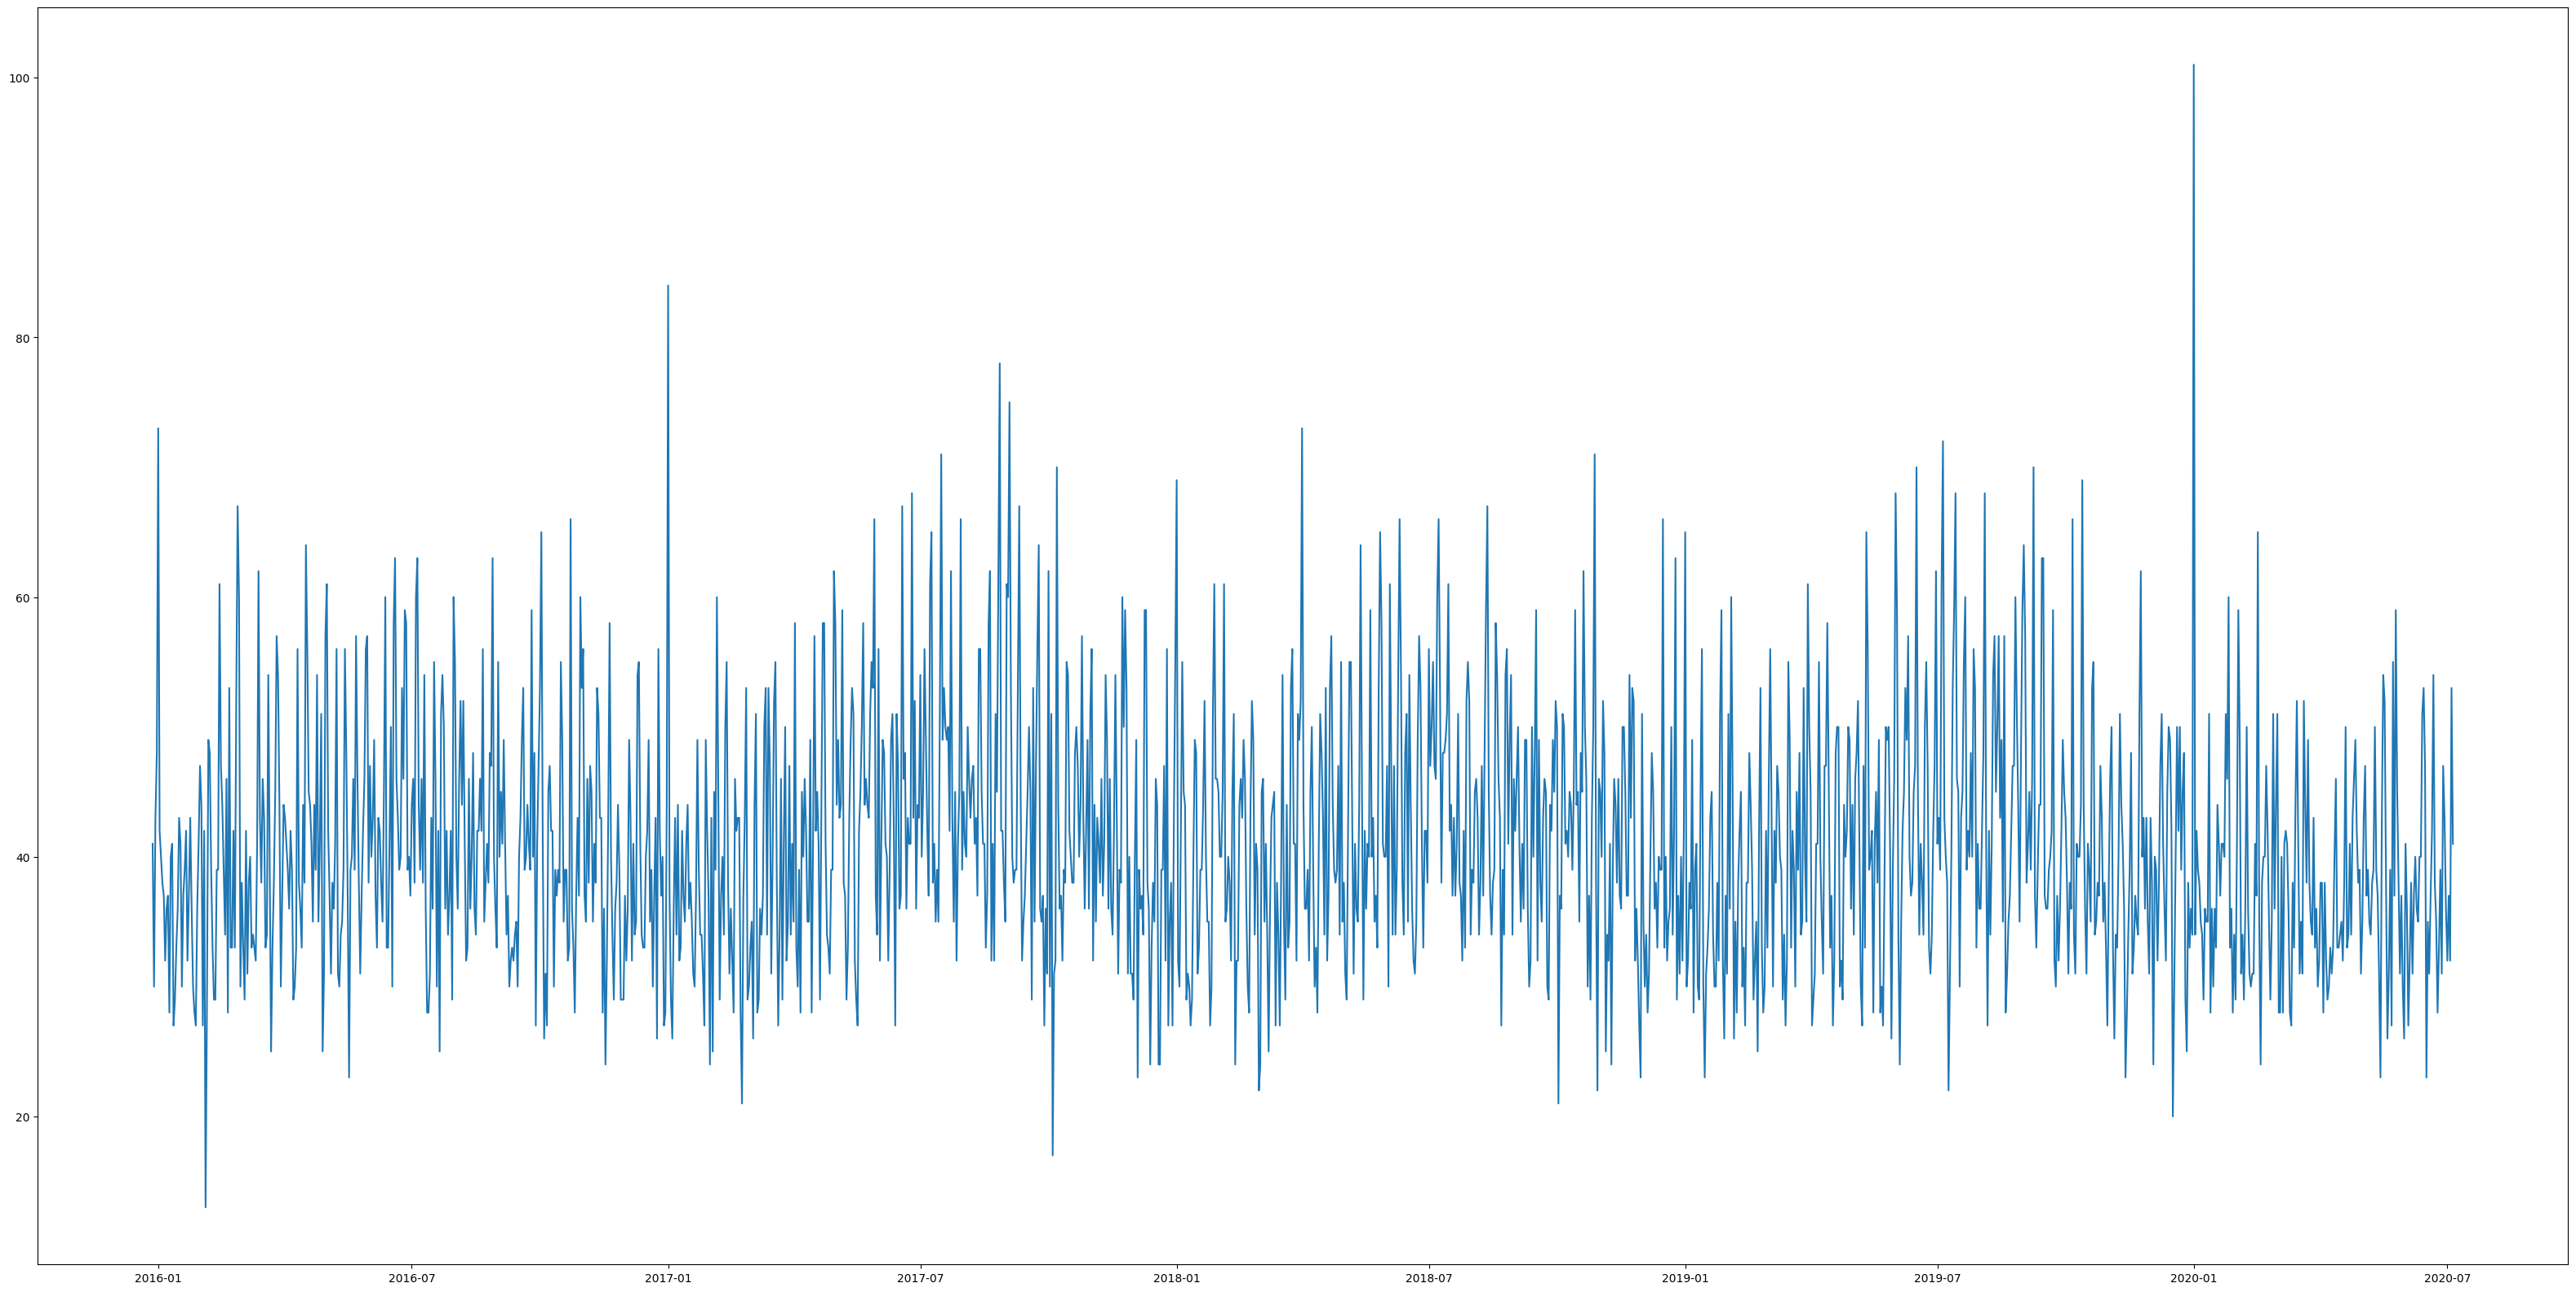

In [331]:
plt.figure(figsize=(40,20))
plt.plot(timed_data)
len(timed_data)

In [333]:
amount = np.array(timed_data['count'].to_list())
len(amount)

1652

In [335]:
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [336]:
from statsmodels.tsa.stattools import adfuller
all_data = np.array(amount)
result = adfuller(amount)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.171951
p-value: 0.000010


In [338]:
lag_acf = acf(all_data, nlags=100)
lag_pacf = pacf(all_data, nlags=12, method='ols')

d = 0
result = adfuller(all_data)
p_value = result[1]
while p_value > 0.05:
    d += 1
    result = adfuller(np.diff(all_data, d))
    p_value = result[1]

p = np.where(lag_pacf < 0.05)[0][0]
q = np.where(lag_acf < 0.05)[0][0]

print("Optimal values: p={}, d={}, q={}".format(p, d, q))

Optimal values: p=2, d=0, q=2


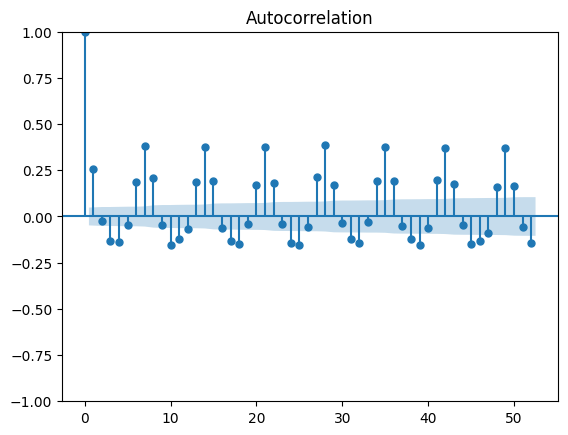

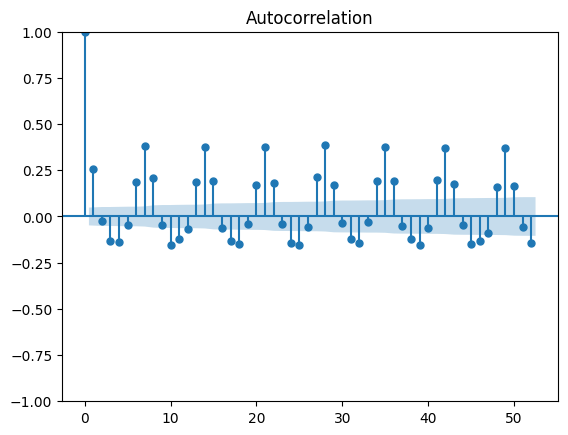

In [340]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(timed_data, lags=52)

/Users/pavlo/IdeaProjects/bakalavr/venv/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


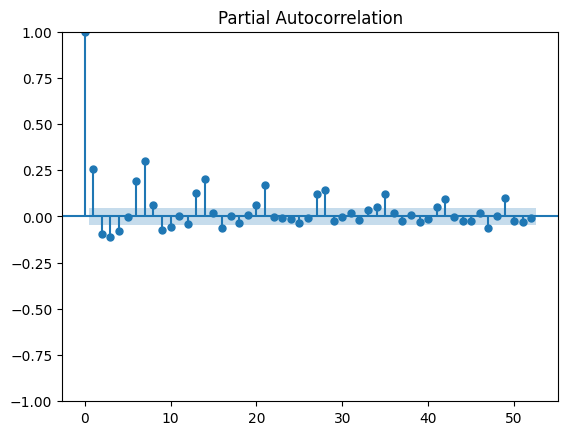

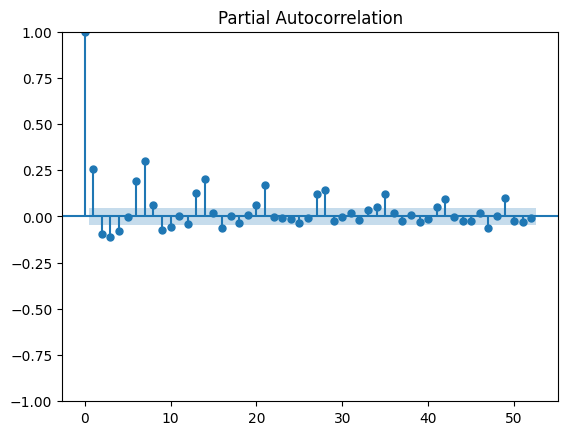

In [341]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(timed_data, lags=52)

In [342]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error


test_size = 56 if mode == 'daily' else 8
train_data = all_data[:-test_size]
test_data = all_data[-test_size:]

In [343]:
model = ARIMA(train_data, order=(7, 0, 7))
results = model.fit()
forecast = results.forecast(steps=len(test_data))
mape = mean_absolute_percentage_error(test_data, forecast)
print(f"ARIMA model fitted successfully. MAPE: {mape:.2f}%")


/Users/pavlo/IdeaProjects/bakalavr/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA model fitted successfully. MAPE: 0.16%


/Users/pavlo/IdeaProjects/bakalavr/venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


plt.figure(figsize=(40,20))
plt.plot(all_data[:], label='Original Data')
plt.plot(np.concatenate([train_data, forecast])[:], label='ARIMA Forecast')
plt.title('ARIMA Forecast of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
np.savetxt(f'arima_{mode}_{datatype}.txt',forecast)

In [345]:
# Check for stationarity using the Augmented Dickey-Fuller test
adf_test = sm.tsa.stattools.adfuller(all_data)
print('ADF statistic: {}'.format(adf_test[0]))
print('p-value: {}'.format(adf_test[1]))
print('Critical values: {}'.format(adf_test[4]))



ADF statistic: -5.171950553638152
p-value: 1.0028519483664088e-05
Critical values: {'1%': -3.4343657092003164, '5%': -2.8633137038658023, '10%': -2.567714280966453}


In [346]:
p = 5
d = 0
q = 5
P = 1
D = 0
Q = 1
S = 7

In [347]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, S))

results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57111D+00    |proj g|=  2.27328D-01


 This problem is unconstrained.



At iterate    5    f=  3.52261D+00    |proj g|=  3.82170D-02

At iterate   10    f=  3.49086D+00    |proj g|=  8.35139D-02

At iterate   15    f=  3.47945D+00    |proj g|=  4.44031D-02

At iterate   20    f=  3.47610D+00    |proj g|=  8.95779D-02

At iterate   25    f=  3.47443D+00    |proj g|=  1.42179D-02

At iterate   30    f=  3.47115D+00    |proj g|=  4.05486D-03

At iterate   35    f=  3.47113D+00    |proj g|=  1.08561D-03

At iterate   40    f=  3.47079D+00    |proj g|=  3.38838D-02

At iterate   45    f=  3.47021D+00    |proj g|=  3.61807D-03


/Users/pavlo/IdeaProjects/bakalavr/venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.47008D+00    |proj g|=  1.09673D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     60      1     0     0   1.097D-02   3.470D+00
  F =   3.4700785580850737     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


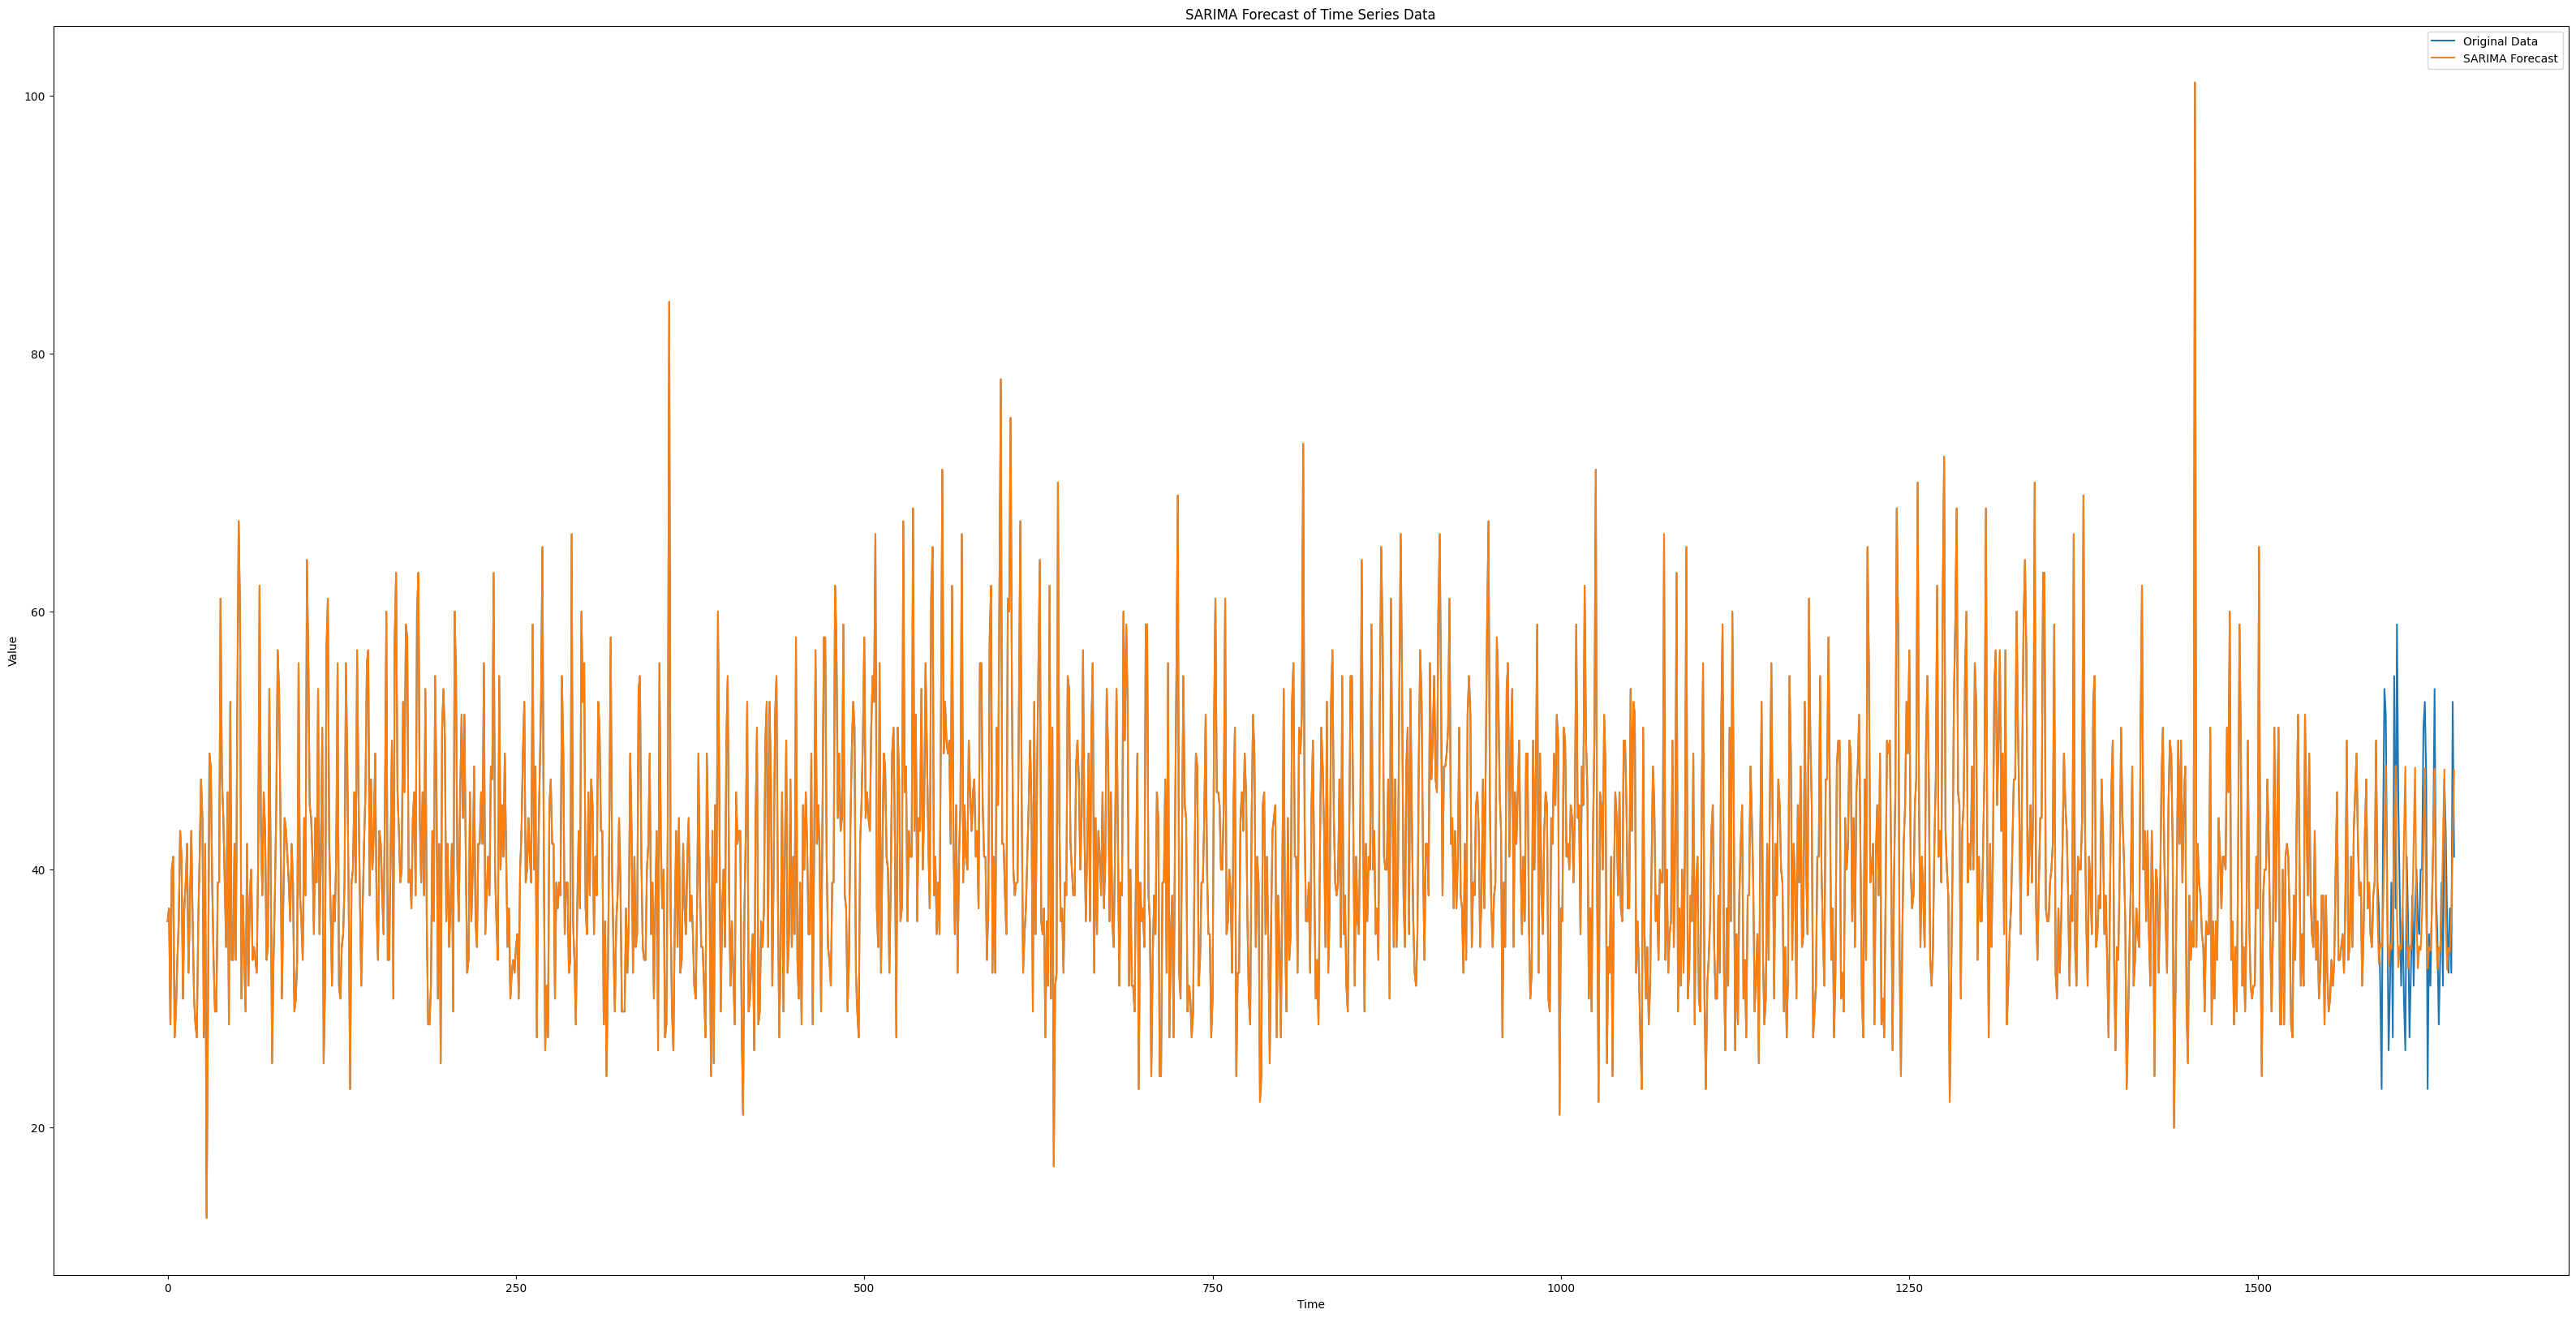

In [348]:
forecast_values = results.forecast(steps=len(test_data))
plt.figure(figsize=(40,20))
plt.plot(all_data[10:], label='Original Data')
plt.plot(np.concatenate([train_data, forecast_values])[10:], label='SARIMA Forecast')
plt.title('SARIMA Forecast of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [349]:
mape = mean_absolute_percentage_error(test_data, forecast_values)
print(f"SARIMA model fitted successfully. MAPE: {mape:.2f}%")
np.savetxt(f'sarima_{mode}_{datatype}.txt',forecast)

ARIMA model fitted successfully. MAPE: 0.17%
